In [1]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_test.csv
/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_train.csv
/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_sample_submission.csv


In [2]:
test_set = pd.read_csv('/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_test.csv')
train_set = pd.read_csv('/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_train.csv')

In [3]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [4]:
train_set = train_set[:200000]

In [5]:
# remove stopwords from train and test set
train_set['review_text'] = train_set['review_text'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop)]))

test_set['review_text'] = test_set['review_text'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop)]))

In [6]:
from keras.preprocessing.text import Tokenizer
#fit tokenizer on training set
vocab_size = 5000
tokens = Tokenizer(num_words = vocab_size ,filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~' , lower = True)
tokens.fit_on_texts(train_set['review_text'].values)
word_indexes = tokens.word_index
print(len(word_indexes))

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

170832


In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# tokenize train set and categorize labels (Train set)
X = tokens.texts_to_sequences(train_set['review_text'].values)
X = pad_sequences(X , maxlen = 250)
y = to_categorical(train_set['rating'] , num_classes = 6)

X_eval, y_eval = X[-100001:], y[-100001:]
X, y = X[:-100000], y[:-100000]

# split to train and eval set (Train set)
X_train ,X_valid , y_train , y_valid = train_test_split(X , y ,test_size = 0.3 ,random_state = 42)

In [8]:
# tokenze test set ( Test set)
X_eval_final = tokens.texts_to_sequences(test_set['review_text'].values)
X_eval_final = pad_sequences(X_eval_final , maxlen = 250 )

# Three-Layer Baseline

In [9]:
neurons = [4 , 8 , 16 , 32 , 64]

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, SimpleRNN, LSTM, Input, GRU, InputLayer, GlobalMaxPooling1D, Dropout

eval_list = []

for neuron in neurons:
    model = Sequential([
        Embedding(input_dim = vocab_size + 1 , output_dim = neuron , input_length = 250),
        Flatten(),
        Dense(neuron , activation = "relu"),
        Dense(6 , activation = "softmax")
    ])
    
    model.compile(loss = "categorical_crossentropy",
                 optimizer = "adam",
                 metrics = ["accuracy"]
                 )
    
    history = model.fit(X_train , y_train ,epochs = 5 ,validation_data = (X_valid , y_valid))
    
    res = model.evaluate(X_eval , y_eval)
    eval_list.append(res[1])
    print(eval_list)

Epoch 1/5
2188/2188 [==============================] - 10s 4ms/step - loss: 1.3255 - accuracy: 0.3985 - val_loss: 1.1925 - val_accuracy: 0.4638
Epoch 2/5
2188/2188 [==============================] - 8s 4ms/step - loss: 1.1526 - accuracy: 0.4835 - val_loss: 1.1520 - val_accuracy: 0.4885
Epoch 3/5
2188/2188 [==============================] - 8s 4ms/step - loss: 1.0783 - accuracy: 0.5273 - val_loss: 1.1087 - val_accuracy: 0.5166
Epoch 4/5
2188/2188 [==============================] - 10s 4ms/step - loss: 1.0343 - accuracy: 0.5482 - val_loss: 1.1102 - val_accuracy: 0.5159
Epoch 5/5
3126/3126 [==============================] - 6s 2ms/step - loss: 1.1352 - accuracy: 0.5109
[0.5109449028968811]
Epoch 1/5
2188/2188 [==============================] - 12s 5ms/step - loss: 1.2246 - accuracy: 0.4580 - val_loss: 1.1103 - val_accuracy: 0.5135
Epoch 2/5
2188/2188 [==============================] - 11s 5ms/step - loss: 1.0594 - accuracy: 0.5398 - val_loss: 1.1059 - val_accuracy: 0.5130
Epoch 3/5
2188/2

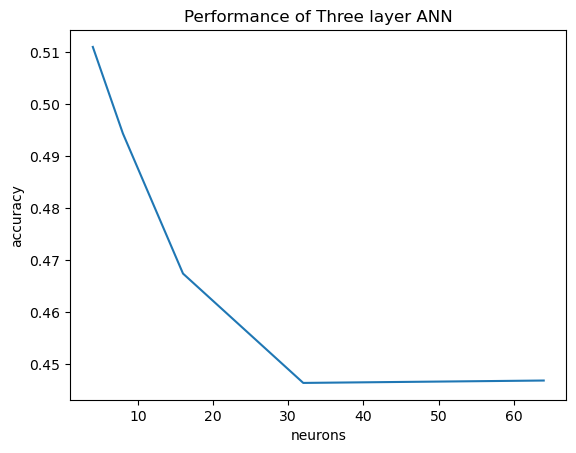

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(neurons , eval_list)
plt.xlabel('neurons')
plt.ylabel('accuracy')
plt.title('Performance of Three layer ANN')
plt.savefig('three-layer-ann.png')
plt.show()

In [12]:
model = Sequential([
        Embedding(input_dim = vocab_size + 1 , output_dim = neuron , input_length = 250),
        Flatten(),
        Dense(4 , activation = "relu"),
        Dense(6 , activation = "softmax")
    ])
    
model.compile(loss = "categorical_crossentropy",
                 optimizer = "adam",
                 metrics = ["accuracy"]
                 )
    
history = model.fit(X_train , y_train ,epochs = 5 ,validation_data = (X_valid , y_valid))

Epoch 1/5
2188/2188 [==============================] - 24s 10ms/step - loss: 1.2449 - accuracy: 0.4606 - val_loss: 1.1414 - val_accuracy: 0.5121
Epoch 2/5
2188/2188 [==============================] - 22s 10ms/step - loss: 0.9898 - accuracy: 0.5824 - val_loss: 1.1747 - val_accuracy: 0.4942
Epoch 3/5
2188/2188 [==============================] - 23s 10ms/step - loss: 0.7233 - accuracy: 0.7128 - val_loss: 1.4020 - val_accuracy: 0.4768
Epoch 4/5
2188/2188 [==============================] - 22s 10ms/step - loss: 0.5039 - accuracy: 0.8118 - val_loss: 1.7093 - val_accuracy: 0.4667
Epoch 5/5
2188/2188 [==============================] - 22s 10ms/step - loss: 0.3531 - accuracy: 0.8743 - val_loss: 2.1966 - val_accuracy: 0.4562


In [13]:
model.evaluate(X_eval , y_eval)

3126/3126 [==============================] - 10s 3ms/step - loss: 2.1756 - accuracy: 0.4545


[2.175607919692993, 0.454475462436676]

In [14]:
predictions = model.predict(X_eval_final)

6250/6250 [==============================] - 17s 3ms/step


In [15]:
# print submissions

final = np.argmax(predictions, axis=1)
submission_df = test_set[['review_id']]
submission_df['rating'] = final.astype(int)
submission_df.to_csv('submission.csv', index=False)

/tmp/ipykernel_20/157042034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['rating'] = final.astype(int)
